# Uczenie maszynowe <br> Zadanie domowe nr 1: Klasyfikacja wektorów nośnych i regresja logistyczna - z elementami konkursu
Politechnika Gdańska, Wydział ETI, Katedra Inżynierii Biomedycznej

# Cel:
Opracować procedurę złożoną z przetwarzania wstępnego oraz klasyfikacji danych w celu uzyskania jak najlepszych wyników klasyfikacji dla zadanego zbioru danych.

# Problem:
Dla zbioru CIFAR-10 należy wybrać przykłady dla wskazanych 3 klas. Następnie opracować procedurę w celu uzyskania najlepszych wyników klasyfikacji mierzonych z użyciem miary F1-score, F1 = 2(recall*precision)/(recall+precision). Do wyznaczenia wartości miary należy zastosować funkcję f1_score z pakietu scikit-learn (from sklearn.metrics import f1_score).

a) dane studentów (imię, nazwisko, numer indeksu), dane grupy, dane przedmiotu, datę, <br>
b) komórki związane z pobraniem danych oraz wyborem danych dla wskazanych klas do dalszej analizy, <br>
c) komórki związane z przetwarzaniem wstępnym, <br>
d) komórki związane z klasyfikacją danych, <br>
e) komórki związane z walidacją modelu (dla danych testowych) wraz z wyznaczeniem i wydrukiem macierzy pomyłek oraz wartości F1 <br>
•    można używać jedynie klasyfikatorów typu: SVC/SVM (dowolnej wersji i implementacji ze wskazaniem wartości hiperparametrów) lub regresji logistycznej (dowolnej wersji i implementacji ze wskazaniem wartości hiperparametrów). NIE MOŻNA używać innych metod klasyfikacji (MLP, CNN, itp.).<br>
•    notatnik powinien zawierać ostatnią komórkę przygotowaną do testowania z dodatkowym zbiorem testowym jaki wykorzystają prowadzący do oceny<br>
•    rozwiązanie powinno być zrealizowane w Pythonie można stosować biblioteki scikit-learn i/lub Keras, TensorFlow, Pytorch.

In [1]:
# Pobranie danych oraz wybór danych dla wskazanych klas do dalszej analizy

The original training dataset shape:  (50000, 1)
The original test dataset shape:  (10000, 1)
The reduced training dataset size:  (15000, 1)
The reduced test dataset size:  (3000, 1)
(50000, 32, 32, 3)


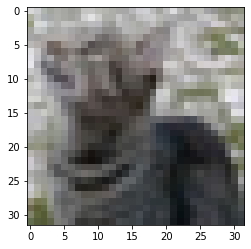

True label:  cat


In [2]:
from keras.datasets import cifar10
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# select three classes: 'plane', 'cat', 'truck'
indexes = [0,3,9]

idx_train = np.array([idx for idx in range(y_train.shape[0]) if y_train[idx] in indexes])
idx_test = np.array([idx for idx in range(y_test.shape[0]) if y_test[idx] in indexes])

x_train_r = x_train[idx_train]
y_train_r = y_train[idx_train]

x_test_r = x_test[idx_test]
y_test_r = y_test[idx_test]

print("The original training dataset shape: ", y_train.shape)
print("The original test dataset shape: ", y_test.shape)

print("The reduced training dataset size: ", y_train_r.shape)
print("The reduced test dataset size: ", y_test_r.shape)

# show and axample
example = 100
print(x_train.shape)
plt.imshow(x_train[idx_train[example],:,:,:])
plt.show()
print("True label: ", class_names[y_train[idx_train[example]][0]])

In [3]:
# Przetwarzanie wstępne

In [4]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score

# Reshape data - flatten (1D)
x_train_flat = x_train_r.reshape((x_train_r.shape[0], x_train_r.shape[1]*x_train_r.shape[2]*x_train_r.shape[3]))
x_test_flat = x_test_r.reshape((x_test_r.shape[0], x_test_r.shape[1]*x_test_r.shape[2]*x_test_r.shape[3]))

# Normalize data from (0-255) to (0.0-1.0)  
x_train_flat = x_train_flat.astype('float32')/255.0
x_test_flat = x_test_flat.astype('float32')/255.0

# Define prepocessing and do transformation
pca =  PCA(n_components=10)
components = pca.fit_transform(x_train_flat)
print(pca.explained_variance_ratio_)

# Use new features or original RAW features - uncomment appropriate
X_tr = components
X_te = pca.fit_transform(x_test_flat)

# X_tr = x_train_flat
# X_te = x_test_flat

[0.28179833 0.1229191  0.06429598 0.04226445 0.03903807 0.02828309
 0.02404532 0.0212168  0.02039854 0.01539721]


In [5]:
# Klasyfikacja danych

In [6]:
# Use a selected model with a given multi-class classification strategy
# model = LogisticRegression(multi_class='ovr')
# model = LogisticRegression(multi_class='multinomial')  # softmax loss function 
# model = SVC(kernel='rbf', decision_function_shape='ovr')
model = SVC(kernel='rbf', decision_function_shape='ovo')


# Fit model
model.fit(X_tr, y_train_r.ravel())


# Estimate class labels for test dataset
y_e = model.predict(X_te)

# Calculate mean accuracy
acc = model.score(X_te, y_test_r)
print("Mean accuracy: ", acc)

# Calculate and show confusion matrix (accuracy is not enough)
print("Confusion matrix:")
conf_matrix = confusion_matrix(y_test_r, y_e)
print(conf_matrix)

f1_score = f1_score(y_test_r, y_e, average="macro")
print("F1 score: ", f1_score)


Mean accuracy:  0.45966666666666667
Confusion matrix:
[[364 329 307]
 [282 524 194]
 [275 234 491]]
F1 score:  0.4580324598196792


In [7]:
# Walidacja modelu dla danych testowych

(1, 10)
True class codes at indexes [0, 1, 2]:  [0, 3, 9]
Predicted class code:  [3]
Predicted class label:  cat
Scores for each class:  [[-1.39443118 -1.17437262  0.71549199]]
True label:  plane


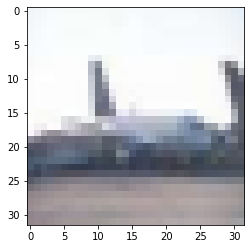

In [8]:
test_example = 201
size = X_te.shape[1]
t = (X_te[test_example]).reshape((1,size))
print(t.shape)

y_e = model.predict(t)
# Class labels were: indexes = [1,2,7]
print("True class codes at indexes [0, 1, 2]: ", indexes)
print("Predicted class code: ",y_e)
print("Predicted class label: ", class_names[y_e[0]])

scores = model.decision_function(t)
print("Scores for each class: ", scores)
print("True label: ",class_names[y_test[idx_test[test_example]][0]])

plt.imshow(x_test[idx_test[test_example],:,:,:])
plt.show()

In [9]:
# Walidacja modelu dla dodatkowych danych testowych